In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 2. Load Dataset
df = pd.read_excel("Data Indeks Kualitas Udara tahun 19-22 - Copy.xlsx", sheet_name="DATA")

In [ ]:
print("Jumlah total data:", df.shape[0])
print("Contoh data (5 baris pertama):")
print(df.head())


Jumlah total data: 896
Contoh data (5 baris pertama):
   X1   X2   X3  X4  X5  X6  X7   X8  X9   X10     X11   X12  X13  kelas
0  23  208  253  71   0  59   3  156   1  4851    4851  9583   17      2
1  21  151  185  62   0  72   3  109   1  5990   17155  6691   22      2
2  22  236  252  62   3  86   6  197   3  4972    3185  4257    4      1
3  19  256  199  75   0  59   3  108   2  6594   27000  4394   93      0
4  17  257  208  65   0  85   4  181   1  6869  229649  4785  708      0


In [ ]:
print("Cek jumlah missing value di setiap kolom:")
print(df.isnull().sum())

Cek jumlah missing value di setiap kolom:
X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
kelas    0
dtype: int64


In [ ]:
# Preprocessing
X = df[[f'X{i}' for i in range(1, 14)]]
y = df['kelas']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Distribusi label pada data latih:")
print(y_train.value_counts())

print("Distribusi label pada data uji:")
print(y_test.value_counts())

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji  :", X_test.shape[0])


Distribusi label pada data latih:
kelas
0    536
1    105
2     75
Name: count, dtype: int64
Distribusi label pada data uji:
kelas
0    125
1     31
2     24
Name: count, dtype: int64
Jumlah data latih: 716
Jumlah data uji  : 180


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-2928597847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


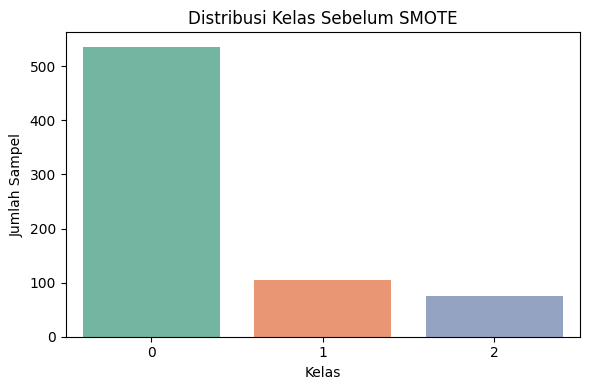

In [ ]:
# Plot distribusi sebelum SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette='Set2')
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.savefig("distribusi_sebelum_smote.png")  # opsional: menyimpan gambar
plt.show()


In [ ]:
# SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_res).value_counts())

print("\nPersentase label setelah SMOTE:")
print((pd.Series(y_train_res).value_counts(normalize=True) * 100).round(2))



Distribusi label setelah SMOTE:
kelas
0    536
2    536
1    536
Name: count, dtype: int64

Persentase label setelah SMOTE:
kelas
0    33.33
2    33.33
1    33.33
Name: proportion, dtype: float64


/tmp/ipython-input-835796044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='Set3')


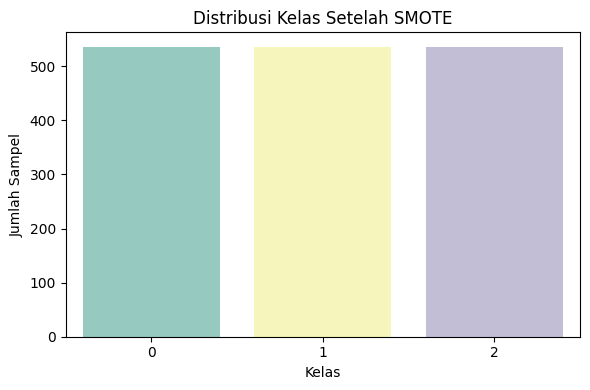

In [ ]:
# Plot distribusi setelah SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res, palette='Set3')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.savefig("distribusi_setelah_smote.png")  # opsional: menyimpan gambar
plt.show()

In [ ]:
# Normalisasi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("hasil normalisasi (5 baris pertama):")
print(pd.DataFrame(X_train_scaled, columns=[f'X{i}' for i in range(1, 14)]).head())

hasil normalisasi (5 baris pertama):
         X1        X2        X3        X4        X5        X6        X7  \
0  0.453074  0.678363  0.644195  0.280899  0.306011  0.206522  0.023077   
1  0.346278  0.570175  0.524345  0.232210  0.000000  0.434783  0.030769   
2  0.566343  0.625731  0.677903  0.273408  0.467213  0.163043  0.069231   
3  0.466019  0.725146  0.865169  0.243446  0.071038  0.391304  0.038462   
4  0.511327  0.652047  0.760300  0.277154  0.259563  0.119565  0.000000   

         X8        X9       X10       X11       X12       X13  
0  0.851632  0.000000  0.020998  0.075936  0.114478  0.373409  
1  0.195846  0.004975  0.076784  0.003852  0.082640  0.004243  
2  0.857567  0.009950  0.107675  0.068793  0.221617  0.024045  
3  0.127596  0.004975  0.089545  0.191356  0.089505  0.070721  
4  0.816024  0.019900  0.105468  0.068793  0.121490  0.024045  


In [ ]:
# format untuk CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Determine the number of unique classes from the original 'y' variable
num_classes = y.nunique()

y_train_cat = to_categorical(y_train_res, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [ ]:
# CNN Model
model = Sequential()
model.add(Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Conv1D(64, kernel_size=5, activation='relu',))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 32)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 64)          │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,235 (122.01 KB)

 Trainable params: 31,235 (122.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 100
#model.fit(X_train_cnn, y_train_cat, epochs=epochs, batch_size=32, validation_data=(X_test_cnn, y_test_cat))
history = model.fit(X_train_cnn, y_train_cat, epochs=epochs, batch_size=32, validation_data=(X_test_cnn, y_test_cat))

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4165 - loss: 1.0750 - val_accuracy: 0.2389 - val_loss: 1.1261
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5078 - loss: 1.0000 - val_accuracy: 0.4944 - val_loss: 1.0011
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5331 - loss: 0.9534 - val_accuracy: 0.4833 - val_loss: 1.0284
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6053 - loss: 0.8660 - val_accuracy: 0.6222 - val_loss: 0.8342
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6300 - loss: 0.7978 - val_accuracy: 0.6778 - val_loss: 0.8284
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6811 - loss: 0.7312 - val_accuracy: 0.7333 - val_loss: 0.7185
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6772 - val_accuracy: 0.7444 - val_loss: 0.7026
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.6358 - val_accuracy: 0.6944 - v

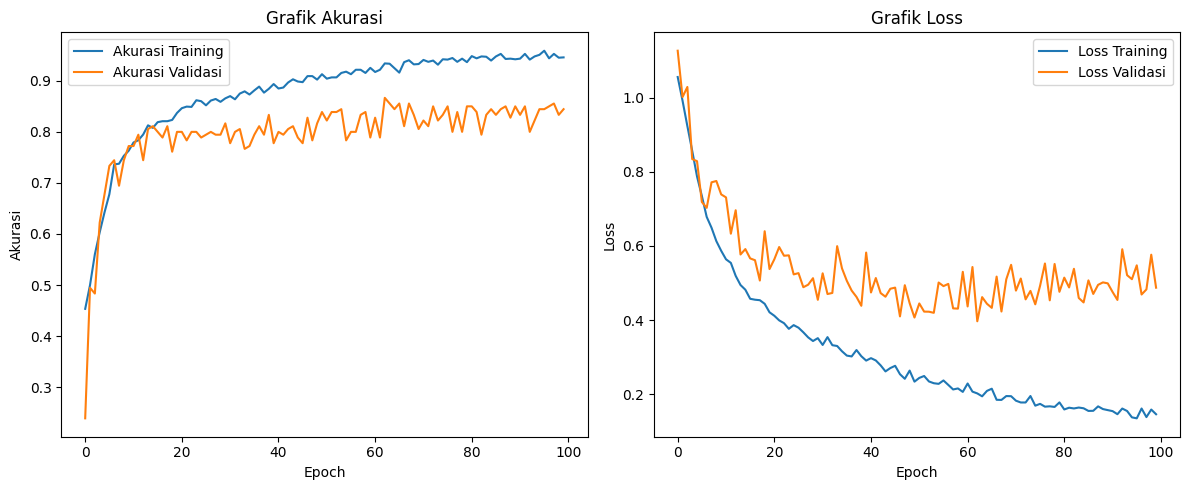

In [ ]:
# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluasi
y_pred = model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       125
           1       0.62      0.77      0.69        31
           2       0.72      0.75      0.73        24

    accuracy                           0.84       180
   macro avg       0.76      0.80      0.78       180
weighted avg       0.86      0.84      0.85       180

